### Lab 05

Labs in general are for you to solve short programming challenges in class. In contrast, homework assignments will involve more challenging and lengthy problems.

Feel free to ask the TAs for help if there is anything you do not understand. The TAs will go through suggested solutions in the last 15 minutes of the lab - typically by solving them in a live demo. **Your midterm exams will be like this, so it is highly beneficial for you to attend these labs**.

The second lab is to gain basic familiarity with using linear algebra to solve problems. 

- You can import any Python library module you need
- Do this lab without using the web to search for solutions

In [1]:
%matplotlib inline

import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg as la

sns.set_context('notebook', font_scale=1.5)

**1**.

- Check that the 3 points (1,1,0), (2,0,-1), (2,9,2) are not collinear
- Find the equation of the plane that passes through these 3 points

In [2]:
X = np.array([
    [1,1,0],
    [2,0,-1],
    [2,9,2]
])

In [3]:
la.det(X)

3.0

Write equation in matrix form

$a_0 + a_1 x + a_2 y = z$

and solve for $a_0$, $a_1$ and $a_2$

In [4]:
m, n = X.shape
A = np.c_[np.ones(m), X[:, :-1]]
A

array([[1., 1., 1.],
       [1., 2., 0.],
       [1., 2., 9.]])

In [5]:
la.solve(A, X[:, -1])

array([ 0.33333333, -0.66666667,  0.33333333])

**2**.

Find the center of the sphere that passes through the points (0,3,2), (1,-1,1), (2,1,0), (5,1,3).

Write as 

$(x-a)^2 + (y-b)^2 + (z-c)^2 = r^2$

and solve for

$2ax + 2by + 2cz + d = x^2 + y^2 + z^2$ 

In [6]:
X = np.array([
    (0,3,2), (1,-1,1), (2,1,0), (5,1,3)
])
X

array([[ 0,  3,  2],
       [ 1, -1,  1],
       [ 2,  1,  0],
       [ 5,  1,  3]])

In [7]:
m, n = X.shape
A = np.c_[2*X, np.ones(m)]
A

array([[ 0.,  6.,  4.,  1.],
       [ 2., -2.,  2.,  1.],
       [ 4.,  2.,  0.,  1.],
       [10.,  2.,  6.,  1.]])

In [8]:
la.solve(A, np.sum(X**2, axis=1))

array([ 2.,  1.,  3., -5.])

Center has coordinates (2,1,3)

**3**. 

We are given (x, y) observations and believe that an appropriate model is $y = b_0 + b_1 x + b_2 x^2 + b_3 \sin(x)$ with some measurement noise. Find the coefficients $b_0, b_1, b_2, b_3$. Plot the data and fitted curve,

In [9]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([ 2.80472383, 10.96184197, 11.79499471,  7.72517373,  2.2119748 ,
       -2.74622086, -0.10312465,  2.78538419,  0.70236037, -8.85784432])

In [10]:
m = len(x)
A = np.c_[np.ones(m), x, x**2, np.sin(x)]
b, resid, rank, s = la.lstsq(A, y)

In [11]:
b

array([ 2.87752103,  2.71420564, -0.4790836 ,  6.59961242])

In [12]:
def f(x, b):
    """Function."""
    return b[0] + b[1] * x + b[2] * x**2 + b[3] * np.sin(x)

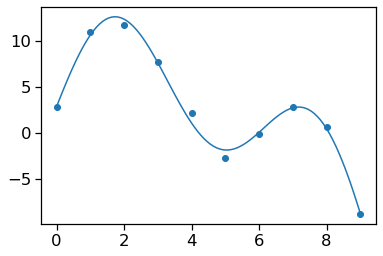

In [13]:
plt.scatter(x, y)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, f(xp, b))
pass

**4**. 

Find the steady state probability vector for the Markov chain shown

- By solving a linear equation
- By Jacobi iteration starting from a random probability vector
- By eigen-decomposition

![img](../data/q4.png)

Linear equation solution. Note: I use the version of the stochastic matrix that has rows summing to 1.

In [14]:
P = np.array([
    [0.2, 0.5, 0.3],
    [0.8, 0.1, 0.1],
    [0.2, 0.2, 0.6]
])

It is more convenient to work with the right stochastic matrix

In [15]:
P = P.T

In [16]:
m, n = P.shape
A = np.eye(m) - P
A

array([[ 0.8, -0.8, -0.2],
       [-0.5,  0.9, -0.2],
       [-0.3, -0.1,  0.4]])

In [17]:
A[-1, :] = [1,1,1]
A

array([[ 0.8, -0.8, -0.2],
       [-0.5,  0.9, -0.2],
       [ 1. ,  1. ,  1. ]])

In [18]:
la.solve(A, np.array([0,0,1]))

array([0.36956522, 0.2826087 , 0.34782609])

Iteration solution

$x_{k+1} = P x_{k}^T$

In [19]:
x = np.random.random(n).reshape(3,1)
x /= x.sum()
x

array([[0.15810293],
       [0.55167289],
       [0.29022418]])

In [20]:
xf = np.linalg.matrix_power(P, 100) @ x
xf /= xf.sum()
xf

array([[0.36956522],
       [0.2826087 ],
       [0.34782609]])

In [21]:
xf = x.copy()
for i in range(100):
    xf = P @ xf
    xf /= xf.sum()
xf

array([[0.36956522],
       [0.2826087 ],
       [0.34782609]])

Eigendecomposition solution

In [22]:
e, v = la.eig(P)

In [23]:
idx = np.argmax(e)
u = v[:, idx]
u /= u.sum()
u

array([0.36956522, 0.2826087 , 0.34782609])

**5**. 

- Find the nodes that belong to a clique in this graph.
- Express the following graph as a sparse matrix in `coo` format

![img](../data/q5.png)

In [24]:
A = np.array([
    [0,2,3,0,0],
    [1,0,4,0,0],
    [1,2,0,3,0],
    [0,0,0,0,3],
    [0,0,0,0,4]
])

In [25]:
M = np.where(A != 0, 1, 0)
M

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [26]:
S = np.where((M > 0) & (M == M.T), 1, 0)
S

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [27]:
S3 = np.linalg.matrix_power(S, 3)
S3

array([[2, 3, 3, 0, 0],
       [3, 2, 3, 0, 0],
       [3, 3, 2, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

By inspection of the diagonal, we see that (a, b, c) belong to a clique.

In [28]:
import scipy.sparse as sp

In [29]:
m = sp.coo_matrix(A)
print(m)

  (0, 1)	2
  (0, 2)	3
  (1, 0)	1
  (1, 2)	4
  (2, 0)	1
  (2, 1)	2
  (2, 3)	3
  (3, 4)	3
  (4, 4)	4
